<a href="https://colab.research.google.com/github/hyamynl619/Build-Projects/blob/master/Build_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap|

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from xgboost import XGBClassifier
import warnings
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [5]:
from google.colab import files
import pandas as pd
import numpy as np

#the file = https://github.com/hyamynl619/Build-Projects/blob/master/google-play-store-apps.zip
uploaded = files.upload()

Saving google-play-store-apps.zip to google-play-store-apps (3).zip


In [6]:
!unzip 'google-play-store-apps (3).zip'

Archive:  google-play-store-apps (3).zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
df = pd.read_csv('googleplaystore.csv')

print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#Checkiung for NaN values or missiung Values and there is none in this Dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
df = df.drop(df[df['Rating'].isnull()].index, axis=0)


In [0]:
df = df.drop(df[df['Content Rating'].isnull()].index, axis=0)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [0]:
df = df.drop(columns=['Current Ver', 'Android Ver', 'Last Updated', 'App', 'Category'])

In [13]:
df.isnull().sum()

Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [14]:
#Looking at the types to see if I need to change any and make them consistent

df.dtypes

Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [15]:
#Looking at the dataset information to make sure we didn't miss any NaN/Null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
Rating            9366 non-null float64
Reviews           9366 non-null object
Size              9366 non-null object
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Genres            9366 non-null object
dtypes: float64(1), object(7)
memory usage: 658.5+ KB


In [0]:
#We're going to get rid of any characters in the dataset 
df["Installs"] = df["Installs"].str.replace("+","") 
df["Installs"] = df["Installs"].str.replace(",","")
df['Price'] = df['Price'].str.replace("$","")
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].replace("Varies with device", "0")
df['Size'] = df['Size'].str.replace("M", "")


In [17]:
df.head(10)

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity
5,4.4,167,5.6,50000,Free,0,Everyone,Art & Design
6,3.8,178,19,50000,Free,0,Everyone,Art & Design
7,4.1,36815,29,1000000,Free,0,Everyone,Art & Design
8,4.4,13791,33,1000000,Free,0,Everyone,Art & Design
9,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity


In [18]:
df.dtypes

Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

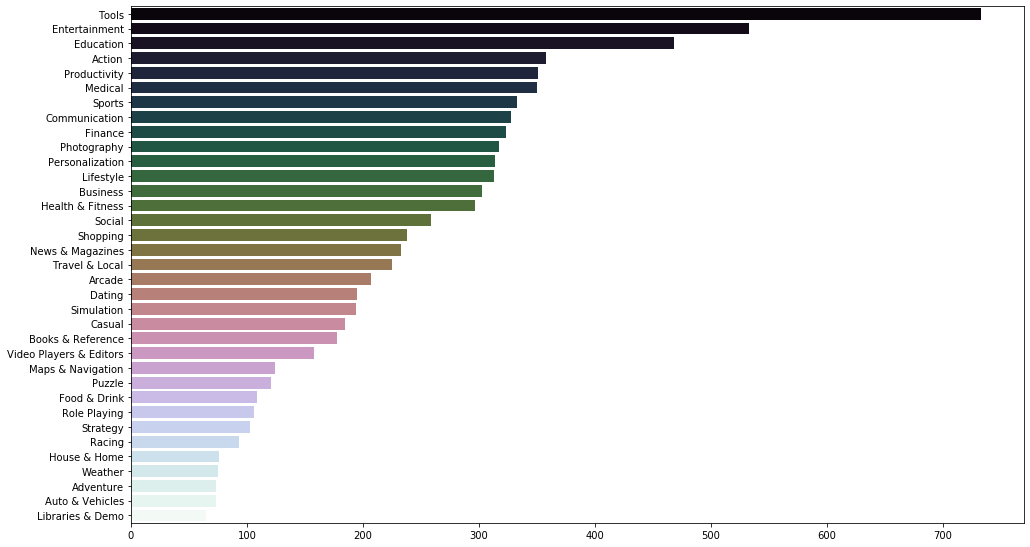

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
#Looking at the top rated genre and how many downloads there were for it

plt.figure(figsize=(16, 9.5))
genres = df['Genres'].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="cubehelix")



In [20]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [21]:
df['Genres'].value_counts().nlargest(15)

Tools               733
Entertainment       533
Education           468
Action              358
Productivity        351
Medical             350
Sports              333
Communication       328
Finance             323
Photography         317
Personalization     314
Lifestyle           313
Business            303
Health & Fitness    297
Social              259
Name: Genres, dtype: int64

In [0]:
Art = df['Genres'].str.contains('Art')
Comics = df['Genres'].str.contains('Comics')
Education = df['Genres'].str.contains('Education')
Entertainment = df['Genres'].str.contains('Entertainment')
Lifestyle = df['Genres'].str.contains('Lifestyle')
Casual = df['Genres'].str.contains('Casual')
Action = df['Genres'].str.contains('Action')
Simulation = df['Genres'].str.contains('Simulation')
Puzzle = df['Genres'].str.contains('Puzzle')
Music = df['Genres'].str.contains('Music')
Health = df['Genres'].str.contains('Health')
Games= df['Genres'].str.contains('Games')
Travel = df['Genres'].str.contains('Travel')
Parenting = df['Genres'].str.contains('Parenting')
Arcade = df['Genres'].str.contains('Arcade')
Board = df['Genres'].str.contains('Board')
Role_Playing = df['Genres'].str.contains('Role Playing')

df.loc[Art, 'Genres'] = 'Art'
df.loc[Comics, 'Genres'] = 'Comics'
df.loc[Education, 'Genres'] = 'Education'
df.loc[Entertainment, 'Genres'] = 'Entertainment'
df.loc[Lifestyle, 'Genres'] = 'Lifestyle'
df.loc[Casual, 'Genres'] = 'Casual'
df.loc[Action, 'Genres'] = 'Action'
df.loc[Simulation, 'Genres'] = 'Simulation'
df.loc[Puzzle, 'Genres'] = 'Puzzle'
df.loc[Music, 'Genres'] = 'Music'
df.loc[Health, 'Genres'] = 'Health'
df.loc[Games, 'Genres'] = 'Games'
df.loc[Travel, 'Genres'] = 'Travel'
df.loc[Parenting, 'Genres'] = 'Parenting'
df.loc[Arcade, 'Genres'] = 'Arcade'
df.loc[Board, 'Genres'] = 'Board'
df.loc[Role_Playing, 'Genres'] = 'Role Playing'

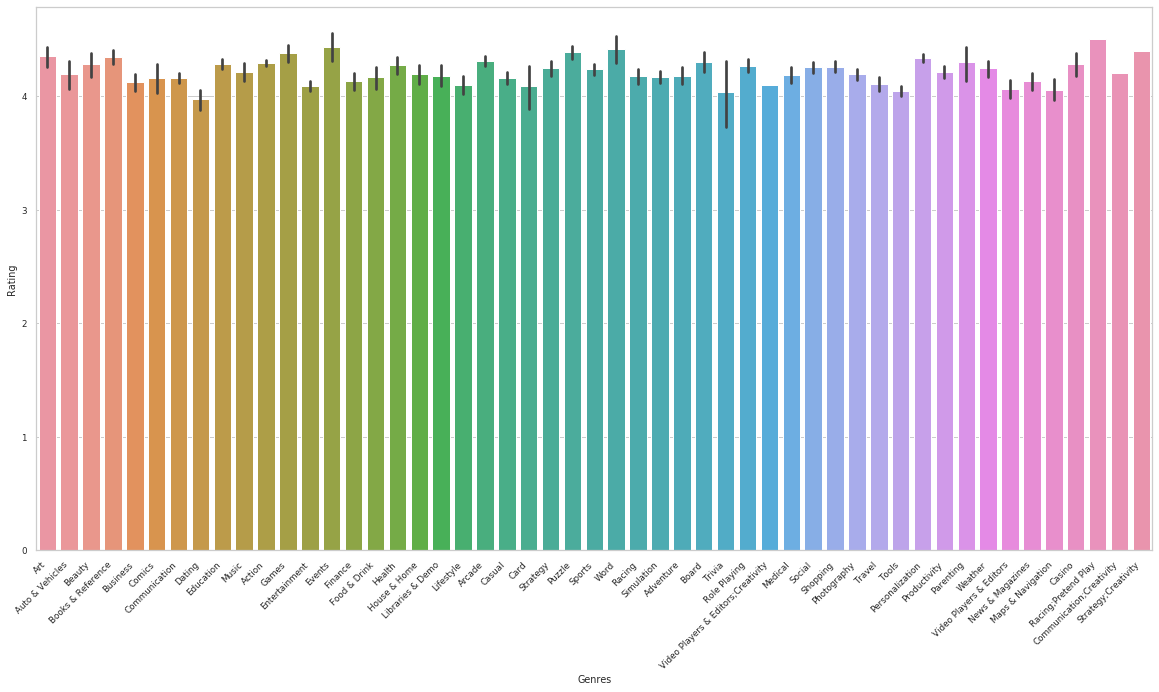

In [23]:
#Lets see what ratings do each genre have
#You can see that the ratings for each genre is pretty close in this dataset

sns.set(rc={'figure.figsize':(20,10)}, font_scale=.8, style='whitegrid')
ax = sns.barplot(x="Genres",y="Rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [24]:
#Only show Genres with ratings of 4.0>

high_rate = df.loc[df["Rating"] >= 4.0]

high_genre = high_rate.groupby('Genres')['Rating'].nunique()
high_genre

Genres
Action                                 9
Adventure                              8
Arcade                                10
Art                                   10
Auto & Vehicles                        8
Beauty                                10
Board                                  9
Books & Reference                     11
Business                              11
Card                                   9
Casino                                 8
Casual                                11
Comics                                10
Communication                         10
Communication;Creativity               1
Dating                                11
Education                             11
Entertainment                         11
Events                                11
Finance                               11
Food & Drink                          10
Games                                  9
Health                                11
House & Home                           9
Libraries

In [25]:
#I'm going to shuffle my dataset then split it 

from sklearn.model_selection import train_test_split
test = df.sample(frac=1,random_state=0).reset_index(drop=True)
train = df.sample(frac=1,random_state=0).reset_index(drop=True)

train, val = train_test_split(train, random_state=None)

train.shape, test.shape, val.shape

((7024, 8), (9366, 8), (2342, 8))

In [0]:
#We need to predict what is the most popular genre based off the number of Installations each category has
#Selecting features and y vectors

target = 'Installs'
features = df.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val= val[target]

In [27]:
#Looking at the different number of Installs 

y_train.value_counts(normalize=True)

1000000       0.169562
10000000      0.129413
100000        0.124288
10000         0.112044
5000000       0.080581
1000          0.075740
500000        0.057375
50000         0.051680
5000          0.045131
100000000     0.043280
100           0.031748
50000000      0.029897
500           0.021925
1000000000    0.007118
500000000     0.006834
10            0.006407
50            0.005695
5             0.001139
1             0.000142
Name: Installs, dtype: float64

In [0]:
#Changing the types of the columns
df["Installs"] = df["Installs"].astype("int64")
df["Price"] = df["Price"].astype("float64")
df["Reviews"] = df["Reviews"].astype("int64")



In [0]:
#Lets Encode the categorical features

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [30]:
#Doing a Logistic Regression fit as a baseline

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None,
                           intercept_scaling=1, max_iter=100,
                           multi_class='ovr', n_jobs=-1,
                           penalty='l2', random_state=42, solver='liblinear',
                           tol=0.0001, verbose=0, warm_start=False, fit_intercept=True)

model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred = model.predict(X_test_encoded)
y_pred

array(['100000000', '100000', '100000', ..., '10000000', '1000000',
       '10000000'], dtype=object)

In [32]:
model.score(X_train_encoded, y_train)

0.70999430523918

In [33]:
model.score(X_val_encoded, y_val)

0.3548249359521776

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer

my_pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='most_frequent'), 
    DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
)

my_pipeline.fit(X_train_encoded, y_train)


print('Train Accuracy', my_pipeline.score(X_train_encoded, y_train))
print('Validation Accuracy', my_pipeline.score(X_val_encoded, y_val))

y_pred = my_pipeline.predict(X_test_encoded)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Train Accuracy 0.9998576309794989
Validation Accuracy 0.33219470538001705


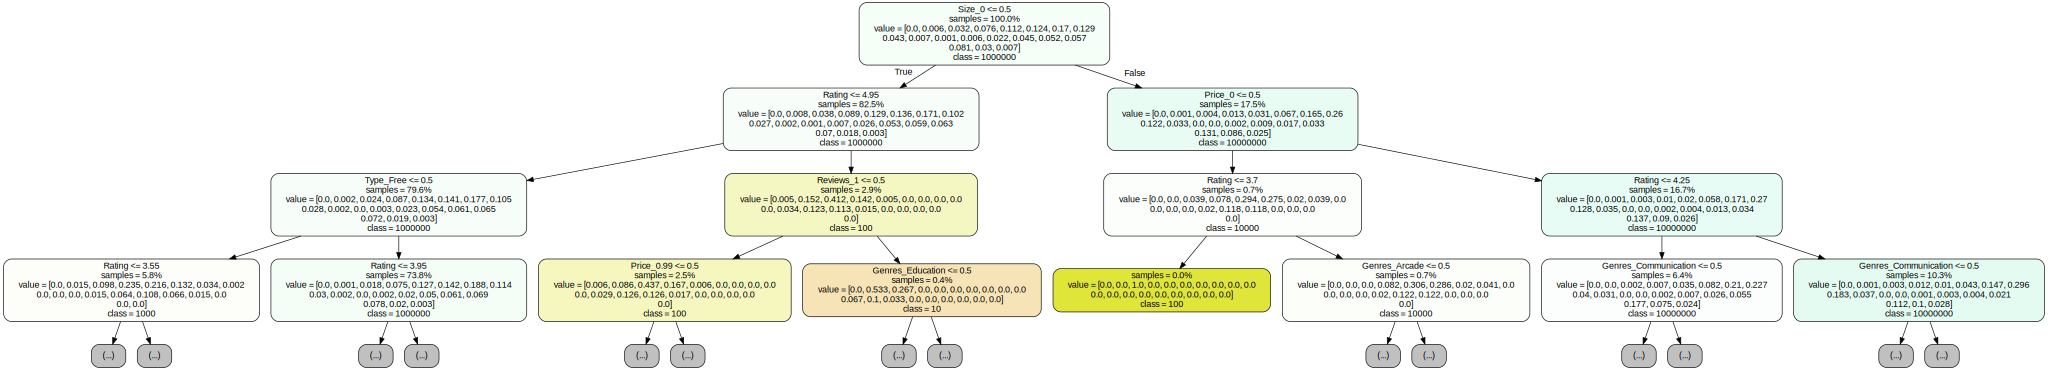

In [35]:
%matplotlib inline
%matplotlib inline
import itertools
from math import floor
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz


model = my_pipeline.named_steps['decisiontreeclassifier']

encoder = my_pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val_encoded).columns
dot_data = export_graphviz(model,
                         out_file=None,
                         max_depth=3,
                         feature_names=encoded_columns,
                         class_names=model.classes_,
                         impurity=False,
                         filled=True,
                         proportion=True,
                         rounded=True)

display(graphviz.Source(dot_data))

In [36]:

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100,
                           max_depth=None, min_samples_leaf=1)
)

# Fit on train, score on val
pipeline.fit(X_train_encoded, y_train)
print('Train Accuracy', pipeline.score(X_train_encoded, y_train))



Train Accuracy 0.9998576309794989


In [37]:
y_pred = model.predict(X_val_encoded)
print('Validy_pipelination Accuracy', accuracy_score(y_val, y_pred))

Validy_pipelination Accuracy 0.33219470538001705


In [38]:
y_pred = model.predict(X_test_encoded)
accuracy_score(y_test, y_pred)

0.8329062566730728

In [43]:
#Binarized the Install columns
test['Installs'] = pd.get_dummies(test['Installs'])


test.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,4.2,1499373,33,1,Free,0,Everyone,Action
1,4.2,2447,2.5,1,Free,0,Everyone,Tools
2,4.3,122010,7.3,1,Free,0,Everyone,Tools
3,4.7,327,31,1,Free,0,Everyone,News & Magazines
4,3.7,400,7.2,1,Free,0,Teen,Video Players & Editors


In [0]:
y_test = test['Installs']

In [45]:
y_pred = pipeline.predict(X_test_encoded)
final_test = X_test.copy()
final_test['Popular']= y_test
final_test[X_test['Rating'] >= 4.0].head(10)

,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Popular
0,4.2,1499373,33,Free,0,Everyone,Action,1
1,4.2,2447,2.5,Free,0,Everyone,Tools,1
2,4.3,122010,7.3,Free,0,Everyone,Tools,1
3,4.7,327,31,Free,0,Everyone,News & Magazines,1
5,5.0,7,20,Free,0,Everyone,Education,1
8,4.7,50424,82,Free,0,Everyone,Photography,1
9,4.4,24281,29,Free,0,Everyone,Travel,1
11,4.5,659,3.3,Paid,3.99,Everyone,Strategy,1
12,4.3,39109,4.0,Free,0,Everyone,Entertainment,1
14,4.1,25,47,Free,0,Everyone,Education,1


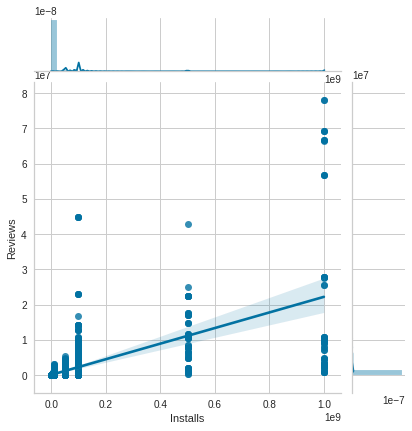

In [52]:
from seaborn import jointplot


new_df = df.copy()
new_df["target"] = y_pred
p = jointplot(
    "Installs", "Reviews", data=new_df, kind="reg"
)
